In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

In [2]:
bom_movie_gross_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\bom.movie_gross.csv')
rt_movie_info_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.movie_info.tsv', sep='\t')
rt_reviews_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\rt.reviews.tsv', sep='\t', encoding = 'unicode_escape')
tmbd_movies_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tmdb.movies.csv')
tn_movie_budgets_df = pd.read_csv(r'C:\Users\micha\coursematerials\phase_1_project\UnzippedData\tn.movie_budgets.csv')

In [3]:
bom_movie_gross_df.head()#calling top 5 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_movie_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [6]:
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [8]:
rt_movie_info_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [9]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [10]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [11]:
rt_reviews_df.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [12]:
#sorting values of popularity 

In [13]:
tmbd_movies_df = tmbd_movies_df.sort_values(['popularity'], ascending=False)

In [14]:
tmbd_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 23811 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.2+ MB


In [15]:
tmbd_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [16]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [18]:
tn_movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [19]:
tn_movie_budgets_df.sort_values(by='worldwide_gross', ascending=False).head(5)#sorting by descending worldwide gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"
5062,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886"
883,84,"Apr 2, 2004",Hellboy,"$60,000,000","$59,623,958","$99,823,958"
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000"


In [20]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '')#replacing commas with nothing

In [21]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace('$', '')#replacing$ with nothing

In [22]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '')#replacing commas with nothing

In [23]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace('$', '')#replacing$ with nothing

In [24]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '')#replacing commas with nothing

In [25]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace('$', '')# replacing $ with nothing

In [26]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('int64')# changing worldwide gross to int

In [27]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('int')#changing production budget to int

In [28]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace('\d+', '') #removing special chars from release date

In [29]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(',', '')#removing commas from release date

In [30]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].str.replace(' ', '')#removing empty space from release date

In [31]:
tn_movie_budgets_df['release_date'] = tn_movie_budgets_df['release_date'].astype('str')#changing release date to string type

In [32]:
tn_movie_budgets_df.drop(tn_movie_budgets_df[tn_movie_budgets_df['worldwide_gross'] == 0].index, inplace = True)

In [33]:
tn_movie_gross_head = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=False).head(10)#sorting values of worldwide gross by descending

Text(0.5, 1.0, 'Movie Vs Worldwide Gross (Top Ten)')

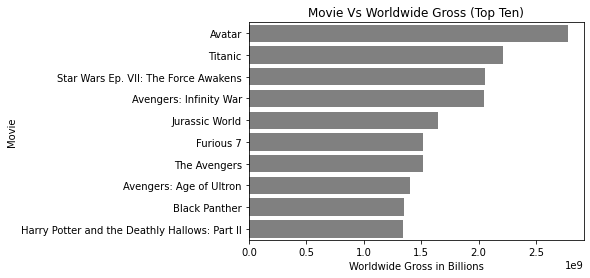

In [34]:
#graphing top ten worldwide gross

sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_head, color = 'Grey')

plt.xlabel('Worldwide Gross in Billions')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross (Top Ten)')

Text(0.5, 1.0, 'Movie Vs Production Budget (Top Ten)')

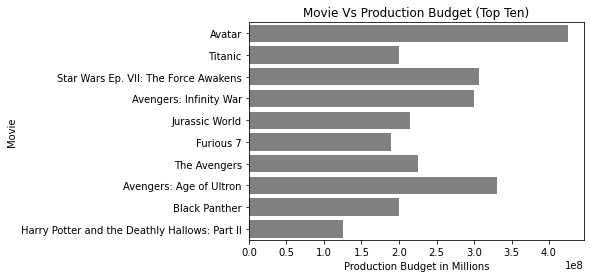

In [35]:
#making barplot for production budget of top ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_head, color = 'Grey')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Top Ten)')

In [36]:
tn_movie_gross_tail = tn_movie_budgets_df.sort_values(by=['worldwide_gross'], ascending=True).head(10)#sorting values of worldwide gross by ascending

Text(0.5, 1.0, 'Movie Vs Worldwide Gross (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


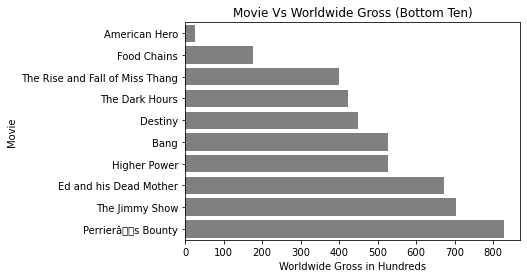

In [37]:
#graphing bottom ten worldwide gross

sns.barplot(x = 'worldwide_gross', y = 'movie', data = tn_movie_gross_tail, color = 'Grey')

plt.xlabel('Worldwide Gross in Hundreds')
plt.ylabel('Movie')
plt.title('Movie Vs Worldwide Gross (Bottom Ten)')

Text(0.5, 1.0, 'Movie Vs Production Budget (Bottom Ten)')

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


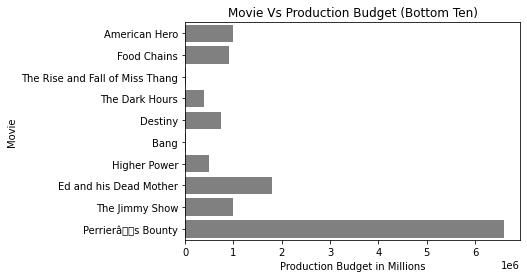

In [38]:
#making barplot for production budget of bottom ten gross

sns.barplot(x = 'production_budget', y = 'movie', data = tn_movie_gross_tail, color = 'Grey')

plt.xlabel('Production Budget in Millions')
plt.ylabel('Movie')
plt.title('Movie Vs Production Budget (Bottom Ten)')

In [39]:
tn_movie_budgets_df.info()# no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5415 non-null   int64 
 1   release_date       5415 non-null   object
 2   movie              5415 non-null   object
 3   production_budget  5415 non-null   int32 
 4   domestic_gross     5415 non-null   object
 5   worldwide_gross    5415 non-null   int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 275.0+ KB


Text(0.5, 1.0, 'Takes money to make money')

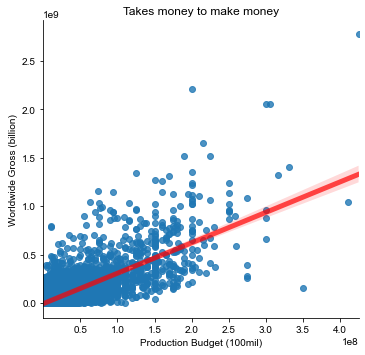

In [40]:
sns.lmplot(data=tn_movie_budgets_df, x='production_budget', y='worldwide_gross', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')


plt.xlabel("Production Budget (100mil)")
plt.ylabel("Worldwide Gross (billion)")
plt.title('Takes money to make money')
#Relation between money put in and money gotten out

In [41]:
release_date_group = tn_movie_budgets_df.groupby('release_date')#creating group of release date(month)

In [42]:
month_group_world = release_date_group.sum(['worldwide_gross'])#finding sum of worldwide gross in release date(month)

In [43]:
monthly_gross_avg = tn_movie_budgets_df.groupby('release_date')['worldwide_gross'].mean().astype('int64')#finding average of worldwide gross from releasedate group, setting to integer type

In [44]:
month_group_world['month_gross_avg'] = monthly_gross_avg.astype('int64')#setting month_group_world ti integer

In [45]:
month_group_world.reset_index(inplace=True)#resettting index of month group world

In [46]:
month_group_world.dtypes

release_date          object
id                     int64
production_budget    float64
worldwide_gross        int64
month_gross_avg        int64
dtype: object

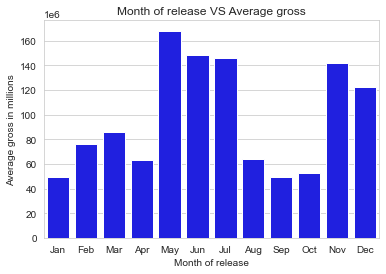

In [47]:
sns.barplot(x = 'release_date',
            y = 'month_gross_avg',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Average gross in millions')
plt.title('Month of release VS Average gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6))
#graphing average gross vs month of release

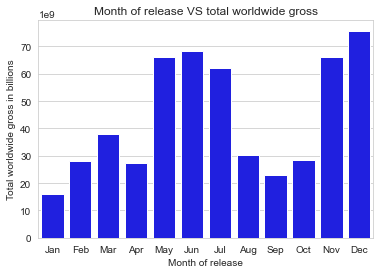

In [48]:
sns.barplot(x = 'release_date',
            y = 'worldwide_gross',
            data = month_group_world,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            color = 'Blue')

plt.xlabel('Month of release')
plt.ylabel('Total worldwide gross in billions')
plt.title('Month of release VS total worldwide gross')
plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
#graphing total worldwide gross vs month of release

In [49]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
Untitled.ipynb
Unzipped Data
UnzippedData
awesome.gif
dsc-phase-1-project-v2-4
im.db
im.db2
movie_data_erd.jpeg
my work.ipynb
student.ipynb
zippedData


In [50]:
#importing SQL db

In [51]:
conn = sql.connect("im.db")

In [52]:
type(conn)

sqlite3.Connection

In [53]:
cur = conn.cursor()

In [54]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,tmdb_movies,tmdb_movies,2,"CREATE TABLE tmdb_movies(\n """" TEXT,\n ""genr..."
1,table,movie_budgets,movie_budgets,610,"CREATE TABLE movie_budgets(\n ""id"" TEXT,\n ""..."


In [55]:
#query of the average number of votes from SQL db movie_ratings
avg_votes = pd.read_sql("""
SELECT avg(numvotes)
FROM movie_ratings
""", conn)

DatabaseError: Execution failed on sql '
SELECT avg(numvotes)
FROM movie_ratings
': no such table: movie_ratings

In [ ]:
#query of average ratings above 9 for writers
query1 = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, numvotes
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500 AND averagerating >= 9.0
""", conn)

In [ ]:
query1.sort_values('averagerating', ascending=False)#sorting by top average writers

In [ ]:
grouped_writers = query1.groupby('primary_name')#grouping writers by name
writer_avg_rating = grouped_writers.mean('averagerating')# finding average rating of writers
writer_avg_rating = writer_avg_rating.reset_index()#reseting index

In [ ]:
writer_avg_rating.sort_values(by=['averagerating'], ascending=False)#sorting average rating writers by avgrating

In [ ]:
#query movies/genre/writer with their average rating ahving more than 3500 votes
genre_query = pd.read_sql("""
SELECT DISTINCT averagerating, primary_name, genres, original_title, movie_basics.movie_id
FROM movie_ratings
INNER JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
INNER JOIN writers
    ON movie_basics.movie_id = writers.movie_id
INNER JOIN persons
    ON writers.person_id = persons.person_id
WHERE death_year is null AND numvotes > 3500
""", conn)

In [ ]:
genre_query.sort_values('averagerating', ascending=False).head(50)#sorting genre query by average rating descending

In [ ]:
genre_query['genres'] = genre_query['genres'].str.replace('Sci-Fi', 'Sci_Fi')#changing sci-fi to sci_fi

In [ ]:
grouped_genre = genre_query.groupby('genres')#grouping genres
genre_avg_rating = grouped_genre.mean('averagerating')#getting mean of average rating
genre_avg_rating = genre_avg_rating.reset_index()#resetting index of groouped genre


In [ ]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#top ten average ratings by genre

In [ ]:
#  seperating genres comma list 

In [ ]:
genres_expanded = genre_query['genres'].str.split(',', expand=True)
genres_expanded.columns = ['Genres'+str(i) for i in genres_expanded.columns]

In [ ]:
# concat back to dataframe

In [ ]:
genres_expanded_concat = pd.concat([genre_query, genres_expanded], axis=1)

In [ ]:
genres_expanded_concat

In [ ]:
#creating new df with comma seperated genres as their own columns
genres_expanded_group = genres_expanded_concat.groupby(['Genres0', 'Genres1', 'Genres2'])
genre_avg_rating = genres_expanded_group.mean('averagerating')
genre_avg_rating = genre_avg_rating.reset_index()

In [ ]:
genre_avg_rating.sort_values(by = 'averagerating', ascending = False).head(10)#sorting top ten averageratings by descending

In [ ]:
melted_genre = genre_avg_rating.melt(var_name='index', value_name='')# changing df to long

In [ ]:
melted_genre

In [ ]:
crosstab_genres = pd.crosstab(index=melted_genre[''], columns=melted_genre['index'])

In [ ]:
crosstab_genres['total_count'] = crosstab_genres['Genres0'] + crosstab_genres['Genres1'] + crosstab_genres['Genres2']
#creating new column with total amounts of movies per genre

In [ ]:
crosstab_genres = crosstab_genres.tail(22)#viewing only the genres(last 22 in df)


In [ ]:
crosstab_genres.reset_index(inplace=True)#replacing index

In [ ]:
crosstab_genres = crosstab_genres.rename(columns={crosstab_genres.columns[0]: 'Movie Genre'})#renaming column (was coming up as index not a column)

In [ ]:
crosstab_genres

In [ ]:
average_list = []#creating new averages list

In [ ]:
average_list= np.unique(np.array(average_list)).tolist()#no duplicates in this list

In [ ]:
action_total = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Action']
rating0 = action_avgrate = action_total['averagerating'].sum() / crosstab_genres['total_count'][0]
average_list.append(rating0)
#finding average rating of action genre

In [ ]:
adventure_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Adventure']
adventure_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Adventure']
adventure_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Adventure']
adventure_total = adventure_total0['averagerating'].sum() + adventure_total1['averagerating'].sum() + adventure_total2['averagerating'].sum()
rating1 = adventure_total / crosstab_genres['total_count'][1]
average_list.append(rating1)
#finding average rating of adventure genre

In [ ]:
Animation_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Animation']
Animation_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Animation']
Animation_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Animation']
Animation_total = Animation_total0['averagerating'].sum() + Animation_total1['averagerating'].sum() + Animation_total2['averagerating'].sum()
rating2 = Animation_total / crosstab_genres['total_count'][2]
average_list.append(rating2)
#finding average rating of animation genre

In [ ]:
Biography_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Biography']
Biography_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Biography']
Biography_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Biography']
Biography_total = Biography_total0['averagerating'].sum() + Biography_total1['averagerating'].sum() + Biography_total2['averagerating'].sum()
rating3 = Biography_total / crosstab_genres['total_count'][3]
average_list.append(rating3)
#finding average rating of Biography genre

In [ ]:
Comedy_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Comedy']
Comedy_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Comedy']
Comedy_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Comedy']
Comedy_total = Comedy_total0['averagerating'].sum() + Comedy_total1['averagerating'].sum() + Comedy_total2['averagerating'].sum()
rating4 = Comedy_total / crosstab_genres['total_count'][4]
average_list.append(rating4)
#finding average rating of comedy genre

In [ ]:
Crime_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Crime']
Crime_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Crime']
Crime_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Crime']
Crime_total = Crime_total0['averagerating'].sum() + Crime_total1['averagerating'].sum() + Crime_total2['averagerating'].sum()
rating5 = Crime_total / crosstab_genres['total_count'][5]
average_list.append(rating5)
#finding average rating of crime genre

In [ ]:
Documentary_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Documentary']
Documentary_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Documentary']
Documentary_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Documentary']
Documentary_total = Documentary_total0['averagerating'].sum() + Documentary_total1['averagerating'].sum() + Documentary_total2['averagerating'].sum()
rating6 = Documentary_total / crosstab_genres['total_count'][6]
average_list.append(rating6)
#finding average rating of Documentary genre

In [ ]:
Drama_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Drama']
Drama_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Drama']
Drama_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Drama']
Drama_total = Drama_total0['averagerating'].sum() + Drama_total1['averagerating'].sum() + Drama_total2['averagerating'].sum()
rating7 = Drama_total / crosstab_genres['total_count'][7]
average_list.append(rating7)
#finding average rating of drama genre

In [56]:
Family_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Family']
Family_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Family']
Family_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Family']
Family_total = Family_total0['averagerating'].sum() + Family_total1['averagerating'].sum() + Family_total2['averagerating'].sum()
rating8 = Family_total / crosstab_genres['total_count'][8]
average_list.append(rating8)
#finding average rating of family genre

NameError: name 'genre_avg_rating' is not defined

In [ ]:
Fantasy_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Fantasy']
Fantasy_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Fantasy']
Fantasy_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Fantasy']
Fantasy_total = Fantasy_total0['averagerating'].sum() + Fantasy_total1['averagerating'].sum() + Fantasy_total2['averagerating'].sum()
rating9 = Fantasy_total / crosstab_genres['total_count'][9]
average_list.append(rating9)
#finding average rating of Fantasy genre

In [ ]:
History_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'History']
History_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'History']
History_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'History']
History_total = History_total0['averagerating'].sum() + History_total1['averagerating'].sum() + History_total2['averagerating'].sum()
rating10 = History_total / crosstab_genres['total_count'][10]
average_list.append(rating10)
#finding average rating of history genre

In [ ]:
Horror_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Horror']
Horror_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Horror']
Horror_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Horror']
Horror_total = Horror_total0['averagerating'].sum() + Horror_total1['averagerating'].sum() + Horror_total2['averagerating'].sum()
rating11 = Horror_total / crosstab_genres['total_count'][11]
average_list.append(rating11)
#finding average rating of horror genre

In [57]:
Music_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Music']
Music_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Music']
Music_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Music']
Music_total = Music_total0['averagerating'].sum() + Music_total1['averagerating'].sum() + Music_total2['averagerating'].sum()
rating12 = Music_total / crosstab_genres['total_count'][12]
average_list.append(rating12)
#finding average rating of music genre

NameError: name 'genre_avg_rating' is not defined

In [ ]:
Musical_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Musical']
Musical_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Musical']
Musical_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Musical']
Musical_total = Musical_total0['averagerating'].sum() + Musical_total1['averagerating'].sum() + Musical_total2['averagerating'].sum()
rating13 = Musical_total / crosstab_genres['total_count'][13]
average_list.append(rating13)
#finding average rating of Musical genre

In [ ]:
Mystery_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Mystery']
Mystery_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Mystery']
Mystery_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Mystery']
Mystery_total = Mystery_total0['averagerating'].sum() + Mystery_total1['averagerating'].sum() + Mystery_total2['averagerating'].sum()
rating14 = Mystery_total / crosstab_genres['total_count'][14]
average_list.append(rating14)
#finding average rating of Mystery genre

In [ ]:
News_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'News']
News_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'News']
News_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'News']
News_total = News_total0['averagerating'].sum() + News_total1['averagerating'].sum() + News_total2['averagerating'].sum()
rating15 = News_total / crosstab_genres['total_count'][15]
average_list.append(rating15)
#finding average rating of News genre

In [58]:
Romance_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Romance']
Romance_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Romance']
Romance_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Romance']
Romance_total = Romance_total0['averagerating'].sum() + Romance_total1['averagerating'].sum() + Romance_total2['averagerating'].sum()
rating16 = Romance_total / crosstab_genres['total_count'][16]
average_list.append(rating16)
#finding average rating of Romance genre

NameError: name 'genre_avg_rating' is not defined

In [ ]:
Sci_Fi_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Sci_Fi']
Sci_Fi_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Sci_Fi']
Sci_Fi_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Sci_Fi']
Sci_Fi_total = Sci_Fi_total0['averagerating'].sum() + Sci_Fi_total1['averagerating'].sum() + Sci_Fi_total2['averagerating'].sum()
rating17 = Sci_Fi_total / crosstab_genres['total_count'][17]
average_list.append(rating17)
#finding average sci_fi genre

In [ ]:
Sport_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Sport']
Sport_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Sport']
Sport_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Sport']
Sport_total = Sport_total0['averagerating'].sum() + Sport_total1['averagerating'].sum() + Sport_total2['averagerating'].sum()
rating18 = Sport_total / crosstab_genres['total_count'][18]
average_list.append(rating18)
#finding average rating of sport genre

In [ ]:
Thriller_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Thriller']
Thriller_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Thriller']
Thriller_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Thriller']
Thriller_total = Thriller_total0['averagerating'].sum() + Thriller_total1['averagerating'].sum() + Thriller_total2['averagerating'].sum()
rating19 = Thriller_total / crosstab_genres['total_count'][19]
average_list.append(rating19)
#finding average rating of thriller genre

In [59]:
War_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'War']
War_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'War']
War_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'War']
War_total = War_total0['averagerating'].sum() + War_total1['averagerating'].sum() + War_total2['averagerating'].sum()
rating20 = War_total / crosstab_genres['total_count'][20]
average_list.append(rating20)
#finding average rating of war genre

NameError: name 'genre_avg_rating' is not defined

In [ ]:
Western_total0 = genre_avg_rating.loc[genre_avg_rating['Genres0'] == 'Western']
Western_total1 = genre_avg_rating.loc[genre_avg_rating['Genres1'] == 'Western']
Western_total2 = genre_avg_rating.loc[genre_avg_rating['Genres2'] == 'Western']
Western_total = Western_total0['averagerating'].sum() + Western_total1['averagerating'].sum() + Western_total2['averagerating'].sum()
rating21 = Western_total / crosstab_genres['total_count'][21]
average_list.append(rating21)
#finding average rating of western genre

In [ ]:
crosstab_genres['averagerating'] = average_list#setting values of averagerating

In [60]:
crosstab_genres = crosstab_genres.sort_values('averagerating', ascending=True)#sorting by average rating ascending

NameError: name 'crosstab_genres' is not defined

In [ ]:
#barplot for average rating by genre
sns.barplot(x = 'averagerating',
            y = 'Movie Genre',
            data = crosstab_genres,
            color = 'Blue')
            

plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Genre by Average Rating')

In [61]:
# querying average rating and runtime minutes

In [62]:
runtime_rating = pd.read_sql("""
SELECT averagerating, runtime_minutes
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
WHERE runtime_minutes <= 200
""", conn)

DatabaseError: Execution failed on sql '
SELECT averagerating, runtime_minutes
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
WHERE runtime_minutes <= 200
': no such table: movie_ratings

In [ ]:
runtime_rating

In [ ]:
runtime_rating['runtime_hours'] = runtime_rating['runtime_minutes'] / 60#dividing runtime by 60 to get total minutes

In [63]:
runtime_rating = runtime_rating.apply(pd.to_numeric, errors = 'coerce')
runtime_rating = runtime_rating.dropna()#dropping an null values

NameError: name 'runtime_rating' is not defined

In [ ]:
runtime_rating.sort_values('runtime_hours', ascending=False)#sorting runtime ratings by descending 

In [ ]:
#creating barplot for "how long is too long"
sns.lmplot(data = runtime_rating, x = 'runtime_hours', y = 'averagerating', line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set_style('whitegrid')

plt.ylabel('Average Film Rating')
plt.xlabel('Runtime in Hours')
plt.title('How long is too long?')

In [64]:
#querying top 10 rated directors of top 5 genres

In [65]:
top_news_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'News'
""", conn)

DatabaseError: Execution failed on sql '
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'News'
': no such table: movie_ratings

In [ ]:
top_news_directors.sort_values(by='averagerating', ascending=False).head(10)

In [ ]:
top_documentary_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Documentary'
""", conn)

In [66]:
top_documentary_directors.sort_values(by='averagerating', ascending=False)

NameError: name 'top_documentary_directors' is not defined

In [ ]:
top_bio_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Biography'
""", conn)

In [ ]:
top_bio_directors.sort_values(by='averagerating', ascending=False).head(10)

In [ ]:
top_animation_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Animation'
""", conn)

In [67]:
top_animation_directors.sort_values(by='averagerating', ascending=False).head(10)

NameError: name 'top_animation_directors' is not defined

In [ ]:
top_musical_directors = pd.read_sql("""
SELECT averagerating, genres, primary_name
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN principals
    ON movie_basics.movie_id = principals.movie_id
JOIN persons
    ON principals.person_id = persons.person_id
WHERE category == 'director' AND death_year is null AND genres == 'Musical'
""", conn)

In [ ]:
top_musical_directors.sort_values(by='averagerating', ascending=False).head(10)

In [68]:
#inserting tn_movie_budgets_df into SQL db

In [69]:
pd.read_sql_query("SELECT * from sqlite_master;", conn)

,type,name,tbl_name,rootpage,sql
0,table,tmdb_movies,tmdb_movies,2,"CREATE TABLE tmdb_movies(\n """" TEXT,\n ""genr..."
1,table,movie_budgets,movie_budgets,610,"CREATE TABLE movie_budgets(\n ""id"" TEXT,\n ""..."


In [70]:
import subprocess
subprocess.run(["sqlite3", "im.db", ".mode csv", ".import UnzippedData/tn.movie_budgets.csv movie_budgets"], capture_output=True)

CompletedProcess(args=['sqlite3', 'im.db', '.mode csv', '.import UnzippedData/tn.movie_budgets.csv movie_budgets'], returncode=0, stdout=b'', stderr=b'')

In [71]:
#importing tmdb.movies into SQl

In [72]:
import subprocess
subprocess.run(["sqlite3", "im.db", ".mode csv", ".import UnzippedData/tmdb.movies.csv tmdb_movies"], capture_output=True)

CompletedProcess(args=['sqlite3', 'im.db', '.mode csv', '.import UnzippedData/tmdb.movies.csv tmdb_movies'], returncode=0, stdout=b'', stderr=b'')

In [73]:
gross_vs_averate = pd.read_sql("""
SELECT DISTINCT movie, title, vote_average, worldwide_gross
FROM movie_budgets
INNER JOIN tmdb_movies
    ON movie_budgets.movie = tmdb_movies.title
""", conn)
#query for movie, title, voteaverage, worldwide gross from tmbd movies and movie_budgets

In [74]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].str.replace('$', '')#removing $

In [75]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].str.replace(',', '')#removing commas

In [76]:
gross_vs_averate['worldwide_gross'] = gross_vs_averate['worldwide_gross'].astype('int64')#setting worldwide gross as int

In [77]:
gross_vs_averate['vote_average'] = gross_vs_averate['vote_average'].astype('float')#setting vote average as float

In [78]:
gross_vs_averate.drop(gross_vs_averate[gross_vs_averate['worldwide_gross'] == 0].index, inplace=True)#dropping unused column

In [79]:
gross_vs_averate

,movie,title,vote_average,worldwide_gross
0,Avatar,Avatar,7.4,2776345279
1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,6.4,1045663875
2,Avengers: Age of Ultron,Avengers: Age of Ultron,7.3,1403013963
3,Avengers: Infinity War,Avengers: Infinity War,8.3,2048134200
4,Justice League,Justice League,6.2,655945209
...,...,...,...,...
2190,Krisha,Krisha,6.8,144822
2191,Krisha,Krisha,9.0,144822
2192,Emily,Emily,7.0,3547
2193,Exeter,Exeter,4.7,489792


Text(0.5, 1.0, 'Average Rating vs Total Gross')

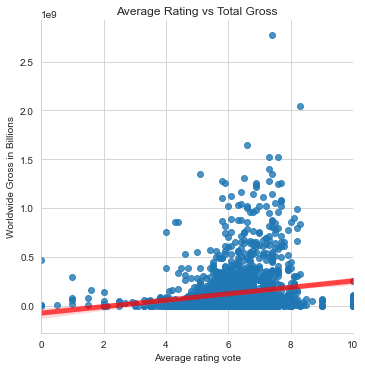

In [80]:
sns.lmplot(x = 'vote_average',
           y = 'worldwide_gross',
           data = gross_vs_averate,
           line_kws={"color":"r","alpha":0.7,"lw":5})


plt.ticklabel_format(style='sci', axis='y', scilimits=(9,9))
plt.xlabel('Average rating vote')
plt.ylabel('Worldwide Gross in Billions')
plt.title('Average Rating vs Total Gross')

#plotting worldwide gross vs average rating

In [81]:
!ls -lah

total 16M
drwxr-xr-x 1 micha 197609    0 Apr 26 11:00 .
drwxr-xr-x 1 micha 197609    0 Apr  1 15:43 ..
drwxr-xr-x 1 micha 197609    0 Apr 25 15:02 .git
-rw-r--r-- 1 micha 197609   16 Apr 25 13:42 .gitignore
drwxr-xr-x 1 micha 197609    0 Apr 25 19:16 .ipynb_checkpoints
-rw-r--r-- 1 micha 197609 1.9K Apr  1 15:52 CONTRIBUTING.md
-rw-r--r-- 1 micha 197609 1.4K Apr  1 15:52 LICENSE.md
-rw-r--r-- 1 micha 197609  23K Apr  1 15:52 README.md
-rw-r--r-- 1 micha 197609   72 Apr  1 16:13 Untitled.ipynb
drwxr-xr-x 1 micha 197609    0 Apr 18 14:23 Unzipped Data
drwxr-xr-x 1 micha 197609    0 Apr  5 14:41 UnzippedData
-rw-r--r-- 1 micha 197609 1.4M Apr  1 15:52 awesome.gif
drwxr-xr-x 1 micha 197609    0 Apr 25 13:08 dsc-phase-1-project-v2-4
-rw-r--r-- 1 micha 197609 8.0M Apr 26 11:00 im.db
-rw-r--r-- 1 micha 197609 5.2M Apr 26 11:00 im.db2
-rw-r--r-- 1 micha 197609 106K Apr  1 15:52 movie_data_erd.jpeg
-rw-r--r-- 1 micha 197609 321K Apr 25 22:52 my work.ipynb
-rw-r--r-- 1 micha 197609  974 Apr  1 1

In [82]:
!ls

CONTRIBUTING.md
LICENSE.md
README.md
Untitled.ipynb
Unzipped Data
UnzippedData
awesome.gif
dsc-phase-1-project-v2-4
im.db
im.db2
movie_data_erd.jpeg
my work.ipynb
student.ipynb
zippedData
